# Prueba de hipótesis

## Prueba t para una muestra

### Antecedentes

La prueba de hipótesis clásica se ocupa de decidir entre dos decisiones (es más complicado si hay más de dos).

 + La primera, se especifica una Hipótesis Nula que representa el status quo. Esta hipótesis se suele etiquetar como **Ho**. Esto es lo que asumimos por defecto. En un sentido práctico, esto significaría que no existe una diferencia significativa entre el conjunto de datos que se evalúa y la población en general.
 
 + La alternativa o hipótesis de investigación es lo que necesitamos evidencia para concluir. Esta hipótesis generalmente se etiqueta **Ha** o, a veces, **H1** (o algún otro número distinto de 0).
 
La convención para la prueba de hipótesis es definir un valor <b>"alfa"</b> o *α* que es el *umbral de probabilidad* para el que aceptamos o rechazamos la hipótesis nula. Esto también se conoce como "Nivel de significación".

Por convención, se elige un valor de 0.05(5%) para *α*, aunque a veces se puede establecer en *α* = 0.01 si queremos más certeza.

Luego, necesitamos calcular el <b>valor p</b>, que es la probabilidad estimada de obtener esta muestra por azar (de la población con la que estamos comparando).

 + Si el valor p es *menor* que **α** entonces "rechazamos" la Hipótesis nula, **Ho** y asumimos que es poco probable que la varianza en la media de nuestra muestra haya ocurrido por casualidad. Existe una diferencia estadísticamente significativa.
 + Si el valor p es *mayor* que **α** entonces "aceptamos" la Hipótesis nula (o al menos, no podemos rechazarla) y asumimos que existe una probabilidad razonable de que la variación en el resultado de nuestra prueba podría haber ocurrido por oportunidad.

## Utilizando Python scipy para probar la significación estadística

La función ``ttest_1samp`` de ``scipy.stats`` se puede utilizar para calcular una estadística T y un valor P para una valor *medio* dado en comparación con una población de muestra.

Si proporcionamos un valor medio y un conjunto de datos de muestra de referencia, si el valor p es menor que nuestro **α** elegido (es decir 0,05), inferimos que nuestro valor medio no es probable que ocurra por casualidad en esta población de muestra. Existe una diferencia estadísticamente significativa. 

#### Descripción de Scipy ttest_1samp

``ttest_1samp`` calcula una prueba T univariante. 

*Esta es una prueba de dos lados para la hipótesis nula de que el valor esperado (media) de una muestra de observaciones independientes a es igual a la media poblacional dada, popmean.*

In [1]:
from scipy.stats import ttest_1samp
import numpy as np
import pandas as pd

In [3]:
ages = np.genfromtxt("Data1/ages.csv")
print(ages)

[32. 34. 29. 29. 22. 39. 38. 37. 38. 36. 30. 26. 22. 22.]


In [4]:
mu = np.mean(ages)
print(mu)

31.0


Utilice la prueba T de scipy para encontrar el valor p para una edad de 30 y también para una edad de 3, dada la distribución de "edades":

In [6]:
?ttest_1samp

In [5]:
print("Age 30", ttest_1samp(ages,30)) #Ho: mu_Age = 30, H1: mu_Age != 30     #less prueba unilateral inferior 
print("Age 3", ttest_1samp(ages,3))  #Ho: mu_Age = 3, H1: mu_Age != 3        #less prueba unilateral superior   

Age 30 TtestResult(statistic=0.5973799001456603, pvalue=0.5605155888171379, df=13)
Age 3 TtestResult(statistic=16.72663720407849, pvalue=3.574863924479613e-10, df=13)


In [8]:
print("Age 30", ttest_1samp(ages,30, alternative = 'less')) #Ho: mu_Age >= 30, H1: mu_Age < 30     #less prueba unilateral inferior 
print("Age 3", ttest_1samp(ages,3, alternative = 'greater'))  #Ho: mu_Age <= 3, H1: mu_Age > 3        #less prueba unilateral superior  

Age 30 TtestResult(statistic=0.5973799001456603, pvalue=0.7197422055914311, df=13)
Age 3 TtestResult(statistic=16.72663720407849, pvalue=1.7874319622398066e-10, df=13)


El valor P es el segundo valor - *esta es la probabilidad estimada de lograr este valor por casualidad* del conjunto de muestra.

Generalmente, si recibimos un *p-valor menor que 0.05, podemos rechazar la hipótesis nula y afirmar que hay una diferencia significativa.*

Para la edad de 30 obtuvimos un valor de p mucho mayor que 0.05, por lo que no podemos rechazar la hipótesis nula. Esto significa que una edad media de 30 años podría ocurrir por casualidad para esta población (aunque nuestra comparación tiene una media de 31).

Para el otro ejemplo, para la edad de 3 años obtuvimos un pequeño valor p; esta sería una edad muy inusual según la muestra original: si tuviéramos un grupo de visitantes con una edad promedio de 3, algo especial está sucediendo.

¿Significa esto que si esperamos más visitantes, la edad media definitivamente sería de 30 años y no de 31? No necesariamente. De hecho, en este caso, sabemos que la media de nuestra muestra fue 31.

  + Los valores P nos dan una idea de la confianza que podemos tener en un resultado.
  + El hecho de que no tengamos suficientes datos para detectar una diferencia no significa que no haya una.

## Prueba t para dos muestras

*Suponga que la semana pasada, la cantidad promedio de tiempo invertido por visitante en un sitio web fue de 25 minutos. Esta semana, la cantidad promedio de tiempo invertido por visitante en un sitio web fue de 28 minutos. ¿Cambió el tiempo medio empleado por visitante? ¿O es esto parte de fluctuaciones naturales?*

Utilice una **Prueba T de 2 muestras**, que compara dos conjuntos de datos independientes, que tienen una distribución aproximadamente normal. La hipótesis nula, en este caso, es que las dos distribuciones tienen la misma media (más o menos alguna variación aleatoria estadística).

Para decidir si los conjuntos de datos se distribuyen aproximadamente normalmente, a menudo es suficiente una inspección visual, como se muestra en el cuadro siguiente.

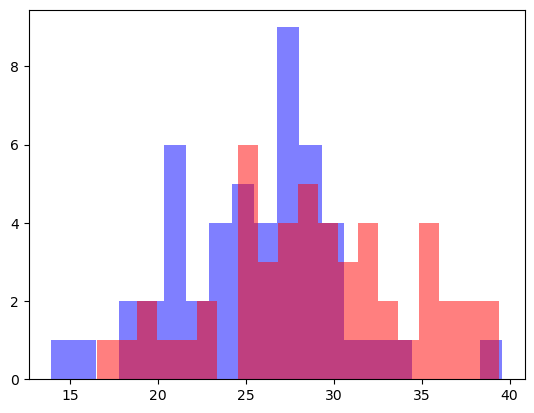

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

week1 = np.genfromtxt("Data1/week1.csv", delimiter=",")
week2 = np.genfromtxt("Data1/week2.csv", delimiter=",")

plt.hist(week1, bins=20, color='b', alpha=0.5)
plt.hist(week2, bins=20, color='r', alpha=0.5)
plt.show()

Utilice ``ttest_ind`` de SciPy para obtener el valor p para dos conjuntos de datos independientes y determinar la probabilidad de que tengan la misma media.

In [3]:
week1_mean = week1.mean()
week2_mean = week2.mean()

print("Week 1 Sample Mean: ", week1_mean)
print("Week 2 Sample Mean", week2_mean)

pval = ttest_ind(week1,week2)
print(pval)

Week 1 Sample Mean:  25.4480593952
Week 2 Sample Mean 29.0215681076
Ttest_indResult(statistic=-3.510875818698744, pvalue=0.000676767690454633)


Si asumimos que **α** es 0.005 y obtenemos un ``pvalue = 0.0006767 ...`` significa que rechazamos la hipótesis nula y decimos que esta es una distribución diferente  la media es significativamente diferente.

In [4]:
if pval[1] < 0.05:
    print("pval is ", pval[1], "Hipótesis Nula Rechazada - las muestras son estadísticamente diferentes")
else:
    print("pval is ", pval[1], "Hipótesis Nula Aceptada - las muestras NO son estadísticamente diferentes")

pval is  0.000676767690454633 Hipótesis Nula Rechazada - las muestras son estadísticamente diferentes


## Peligros de múltiples pruebas T

Supongamos que somos dueños de una cadena de tiendas que venden hormigas, llamada VeryAnts. Hay tres ubicaciones diferentes: A, B y C. Queremos saber si las ventas promedio de hormigas durante el último año son significativamente diferentes entre las tres ubicaciones.

Al principio, parece que podríamos realizar pruebas T entre cada par de tiendas.

Sabemos que el valor p es la probabilidad de que rechacemos incorrectamente la hipótesis nula en cada prueba t. Cuantas más pruebas t realizamos, es más probable que obtengamos un falso positivo, un error de tipo I.

Para un valor p de 0.05, si la hipótesis nula es verdadera, entonces la probabilidad de obtener un resultado significativo es ``1 - 0,05 = 0,95.``

Cuando ejecutamos otra prueba t, la probabilidad de obtener un resultado correcto es ``0,95 * 0,95 = 0,9025``¡Esto significa que nuestra probabilidad de cometer un error ahora es cercana 10%! Esta probabilidad de error solo aumenta con más pruebas t que hacemos.

## Pruebas ANOVA para múltiples conjuntos de datos

Vimos que la probabilidad de cometer un error de Tipo I aumentaba peligrosamente a medida que realizamos más prueba t.

Al comparar más de dos conjuntos de datos numéricos, la mejor manera de preservar una probabilidad de error de tipo I de 0.05 es usar *ANOVA*. ANOVA(Análisis de varianza) prueba de hipótesis nula de que todos los conjuntos de datos tienen la misma media. Si rechazamos la hipótesis nula con ANOVA, estamos diciendo que al menos uno de los conjuntos tiene una media diferente (desde una perspectiva de significación estadística); sin embargo, no nos dice qué conjuntos de datos son diferentes.

Utilice la función SciPy ``f_oneway`` para realizar ANOVA en múltiples conjuntos de datos. Toma cada conjunto de datos como una entrada diferente y devuelve la estadística t y el valor p.P.EJ: ``fstat, pval = f_oneway (puntuaciones_matemáticos, puntuaciones_escritores, puntuaciones_psicólogos)`` devuelve el pval de *al menos uno de* los conjuntos de datos que son estadísticamente diferentes. Sin embargo, después de usar solo ANOVA, no podemos sacar ninguna conclusión sobre *qué* dos poblaciones tienen una diferencia significativa.

"El ANOVA unidireccional prueba la hipótesis nula de que dos o más grupos tienen la misma media poblacional".

Una prueba *unidireccional* identifica si al menos dos grupos son diferentes entre sí, pero no identifica qué grupos. Se usa cuando hay una variable independiente y una variable dependiente.

Se puede usar una prueba *bidireccional* cuando hay *dos* variables independientes, es decir, tienda y hora del día (factores)

Supuestos de prueba de Anova

 + Las muestras son independientes
 + Cada muestra proviene de una población distribuida normalmente.
 + Las desviaciones estándar de la población de los grupos son todas iguales. Esta propiedad se conoce como homocedasticidad.
 
 


##### Ejemplo: prueba Anova unidireccional

Realice una prueba ANOVA para las ventas diarias en las tiendas a,b y c y almacene el valor p en una variable llamada pval.

Primero, carguemos algunos conjuntos de datos de prueba para tres tiendas diferentes y visualícelos

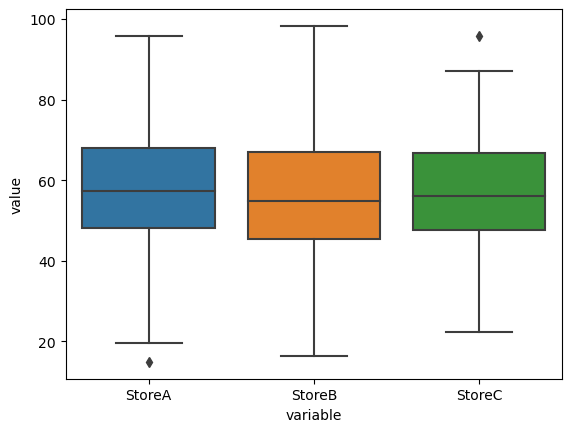

In [7]:
import numpy as np
import seaborn as sns #Seaborn has some nice looking plot characteristics
import pandas as pd

storeA = np.genfromtxt("Data1/storeA.csv", delimiter=",")
storeB = np.genfromtxt("Data1/storeB.csv", delimiter=",")
storeC = np.genfromtxt("Data1/storeC.csv", delimiter=",")

# Create a Pandas Data Frame with Store A,B,C as the columns 
df = pd.DataFrame({'StoreA':storeA, 'StoreB':storeB, 'StoreC':storeC})

# Have to "melt" the data-frame for Seaborn
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

In [8]:
print("Store A Mean:", storeA.mean().round(3))
print("Store B Mean:", storeB.mean().round(3))
print("Store C Mean:", storeC.mean().round(3))

Store A Mean: 58.35
Store B Mean: 55.754
Store C Mean: 56.767


A continuación, ejecute una prueba ANOVA unidireccional y obtenga el valor p:

In [9]:
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

# Ho: mu_Store_A = mu_Store_B = mu_Store_C
# Ha: al menos un promedio es diferente 
pval = f_oneway(storeA,storeB,storeC)[1]
print(pval.round(5))

0.32132


Como el valor p es mayor que 0.05, *NO rechazamos la Hipótesis nula* y asumimos que no hay una diferencia significativa en las ventas entre las tiendas, aunque los valores medios son ligeramente diferentes.

Aunque visualmente en el diagrama de caja parece que hay una diferencia, esta probablemente sea solo una variación aleatoria natural.

Ahora: **cargue algunos datos nuevos** después de que se ejecute una campaña de ventas para la Tienda C.

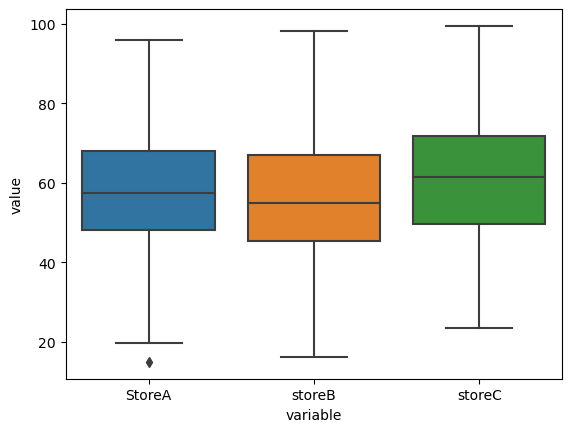

In [13]:
storeC = np.genfromtxt("Data1/storeC_NEW.csv", delimiter=",")
# Create a Pandas Data Frame with Store A,B,C as the columns
df = pd.DataFrame({'StoreA':storeA, 'storeB':storeB, 'storeC':storeC})

#plot
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

In [14]:
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

pval = f_oneway(storeA,storeB,storeC)[1]

print(pval.round(5))

0.01859


Entonces, si nuestro **α** es 0.05, entonces Rechazamos la Hipótesis Nula y decimos que es poco probable que esta variación en la media haya ocurrido por casualidad, ya que 0.0185 es menor que 0.05.

Sin embargo, si hubiéramos elegido nuestro umbral de **α** en 0,01(1%), todavía aceptaríamos la hipótesis nula y diríamos que todavía existe una probabilidad estadística razonable de que esta variación en la media haya ocurrido por casualidad. Esto es porque 0.01859 es mayor que 0.01

Esto ilustra la limitación de usar la prueba del valor p para determinar la significación estadística.

## Efecto del tamaño de la muestra para determinar una variación significativa

En términos generales, cuantas más muestras tengamos de una población, con mayor precisión podremos determinar la media real.

Esto se debe a que la *Muestra* Media $\bar{X}$ es una aproximación a la *Real* Media, $\mu$ dada por la siguiente fórmula:

  $\mu = \bar{X} \pm  \frac { 2\sigma } {\sqrt{n}}   $

+ lo que significa que a medida que $n$, el tamaño de la muestra aumenta, el tamaño de variación de $pm$ disminuye y estamos más cerca de la media real, lo que intuitivamente tiene sentido.

Esto se puede demostrar con una simple simulación de nuestro conjunto de datos existentes. En el siguiente ejemplo, *disminuimos* $n$ a 50 tomando una muestra aleatoria de 50 artículos de cada uno de los conjuntos de datos de la tienda.

In [21]:
len(storeA)

150

In [31]:
np.random.seed(1)
storeAsample = np.random.choice(storeA, size=50, replace=False)
storeBsample = np.random.choice(storeB, size=50, replace=False)
storeCsample = np.random.choice(storeC, size=50, replace=False)

Compare visualmente la distribución de las ventas originales de StoreA y la muestra aleatoria de 50 ventas del conjunto de datos StoreA:

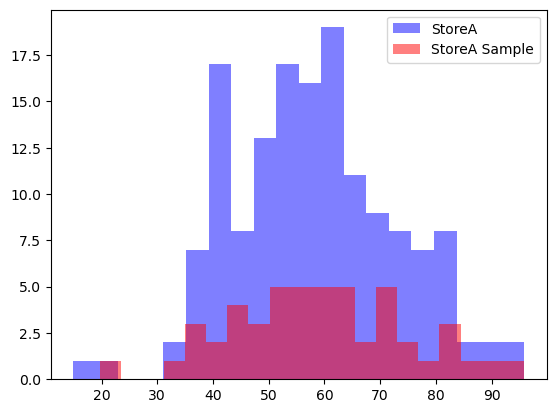

In [32]:
plt.hist(storeA, bins=20, alpha=0.5, color='b')
plt.hist(storeAsample, bins=20, alpha=0.5, color='r')
leg = ['StoreA', 'StoreA Sample']
plt.legend(leg)
plt.show()

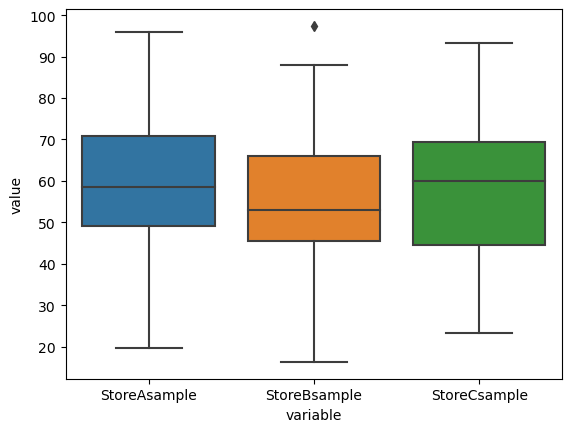

In [33]:
# Create a Pandas Data Frame with Store A,B,C as the columns and plot
df = pd.DataFrame({'StoreAsample':storeAsample, 'StoreBsample':storeBsample, 'StoreCsample':storeCsample})
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

In [34]:
pval = f_oneway(storeAsample,storeBsample,storeCsample)[1]
print(pval.round(5))

0.47443


#### Conclusión

Con la muestra más pequeña de datos, aunque podemos ver que StoreC todavía tiene las ventas medias más altas, ya no podemos detectar ninguna diferencia estadística(el valor p es mayor que 0.05)

## Pruebas de rangos de Tukey

Se puede usar una prueba de rango de Tukey para averiguar *qué* conjunto de datos es diferente si hemos determinado que uno de nuestros conjuntos de datos tiene una diferencia significativa (es decir, utilizando ANOVA para probar una diferencia significativa en la media).

Si alimentamos un conjunto de conjuntos de datos que son independientes y están distribuidos normalmente, la prueba de Tukey puede identificar qué pares de conjuntos son diferentes entre sí.

La función para realizar la prueba de rango de Tukey es ``pairwise_tukeyhsd``, que se encuentra en ``statsmodel``, no scipy.

Proporcione a la función una lista de datos y una lista de etiquetas que identifique los datos frente a conjuntos de muestras.

Además, proporcione el nivel de significancia "p-val" que se requiere, es decir, 0.05.

In [38]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Concate the the data into a single list / vector
vec = np.concatenate((storeA , storeB, storeC),axis=0)
# Create a vector of labels aligned to out data
labels = ['A'] * len(storeA) + ['B'] * len(storeB) + ['C'] * len(storeC)

tukey_results = pairwise_tukeyhsd(vec, labels, 0.05)

In [39]:
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B  -2.5955  0.315 -6.7975 1.6065  False
     A      C   2.4712 0.3507 -1.7308 6.6731  False
     B      C   5.0667 0.0132  0.8647 9.2686   True
---------------------------------------------------


Esto nos dice que podemos *Rechazar* a Hipótesis nula para la Tienda C frente a la Tienda B: hay una diferencia significativa.

## Prueba KS

Realiza la prueba de bondad de ajuste de Kolmogorov - Smirnov.

La prueba de una muestra compara la distribución subacente F(x) de una muestra con una distribución dada G(x). La prueba de dos muestras compara las distribuciones subyacente de dos muestras independientes. Ambas pruebas son válidas solo para distribuciones continuas.

La hipótesis nula es que las dos distribuciones son idénticas, F(x) = G(x) para todo x; la alternativa es que no sean idénticos.

In [40]:
from scipy.stats import kstest
from scipy import stats

In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
?kstest

In [46]:
rng = np.random.default_rng()
x = np.linspace(-15, 15, 9)
kstest(x, stats.norm.cdf)

KstestResult(statistic=0.4443560271592436, pvalue=0.03885014008678811, statistic_location=3.75, statistic_sign=-1)

Se debe rechazar la hipótesis nula a favor de la hipótesis alternativa. Por lo que la distribución de x no se aproxima a la normal.

In [47]:
x = stats.norm.rvs(loc=0, size=1000)
kstest(x, stats.norm.cdf)

KstestResult(statistic=0.02990354236588727, pvalue=0.326413268420903, statistic_location=-0.47918491512740585, statistic_sign=-1)

No se puede rechazar la hipótesis nula a favor de la hipótesis alternativa. Por lo que la distribución de x se aproxima a la normal.

Prueba de t variables aleatorias distribuidas contra distribución normal:

Con 100 grados de libertad, la distribución t parece cercana a la distribución normal, y la prueba KS no rechaza la hipótesis de que la muestra proviene de la distribución normal:

In [51]:
stats.kstest(stats.t.rvs(100, size=100), stats.norm.cdf)

KstestResult(statistic=0.05047647545013151, pvalue=0.9495376339576618, statistic_location=-0.2006746908575728, statistic_sign=-1)

Con 3 grados de libertad, la distribución t parece cercana a la distribución normal, y la prueba KS no rechaza la hipótesis de que la muestra proviene de la distribución normal:

In [52]:
stats.kstest(stats.t.rvs(3, size=100), stats.norm.cdf)

KstestResult(statistic=0.16051264066027615, pvalue=0.010195956084708024, statistic_location=1.0386345764801945, statistic_sign=-1)

Si queremos comparar la distribución para 2 muestras independientes con KS, podemos usar:

In [54]:
from scipy.stats import ks_2samp


In [55]:
week1 = np.genfromtxt("Data1/week1.csv", delimiter=",")
week2 = np.genfromtxt("Data1/week2.csv", delimiter=",")

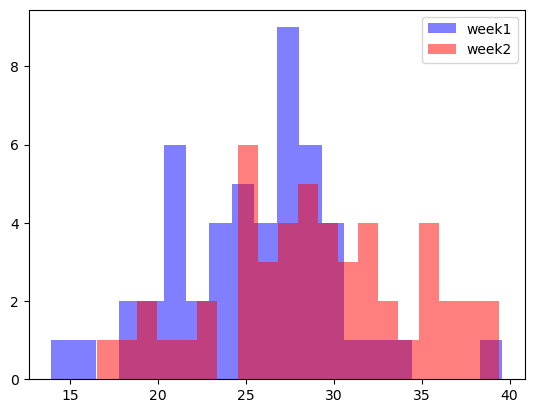

In [56]:
plt.hist(week1, bins=20, alpha=0.5, color='b')
plt.hist(week2, bins=20, alpha=0.5, color='r')
leg = ['week1', 'week2']
plt.legend(leg)
plt.show()

In [57]:
ks_2samp(week1,week2)

KstestResult(statistic=0.38, pvalue=0.0013147736033165794, statistic_location=28.61026924, statistic_sign=1)

Se debe rechazar la hipótesis nula a favor de la hipótesis alternativa. Por lo que la distribución de los datos son diferentes.

## Prueba chi-cuadrado

La prueba de chi-cuadrado de Pearson se puede utilizar para probar las diferencias significativas entre los grupos en los que participan múltiples factores en el resultado, es decir, una comparación de las respuestas de la encuesta("A" frente "B") para algunas personas a las que se les ha dado una de *dos* conjuntos de información (como información "verdadera" e información "falsa", por ejemplo).

El Chi-Cuadrado toma una entrada de tabla de contingencia similar a la siguiente.
```
          | A   |  B  
 ---------------------         
    true  | 30  | 10 
    false | 20  | 20 
```
...por lo que parece que dar a las personas información falsa sesga el resultado en un 10/40 o un 25% en este ejemplo.

La tabla de contingencia puede tener tantas columnas y filas como sea necesario.

 + Filas = Resultados
 + Columnas = Condiciones
 
 #### Ho : Observados = Esperados ....No hay relacion entre las variables de filas y columnas, son independientes
 
 #### Ha : Observados <> Esperados ....Hay relacion entre las variables de filas y columnas, no son independientes
 
 Utilice la función ``chi2_contingency`` de Scipy Stats para realizar una prueba de chi cuadrado:
 

In [58]:
from scipy.stats import chi2_contingency

X = [[30,10],
     [20,20]]

chi2, pval, dof, expected = chi2_contingency(X)
print(pval.round(5))

0.03767


Sobre la base de esto, *Aceptamos la Hipótesis nula al 1% de significancia* y decimos que esta variación podría haber ocurrido por casualidad.

¿Qué pasa si obtenemos la misma diferencia de razón para una muestra más grande?

In [59]:
X = [[300,100],
     [200,200]]

chi2, pval, dof, expected = chi2_contingency(X)
print(pval)

4.832154459214226e-13


....podemos estar bastante seguros de que esta es una diferencia significativa y definitivamente *Rechazamos la hipótesis nula.*

#### Otro ejemplo:

La gerencia de la tienda de hormigas VeryAnts quiere saber si sus dos especies de hormigas más populares, la cortadora de hojas y la cosechadora, varían en popularidad entre los estudiantes de 1°, 2° y 3° grado.

Hemos creado una tabla que representa las diferentes hormigas compradas por los niños en los grados 1,2 y 3 después del último gran viaje de campo a VeryAnts. Ejecute el código para ver qué sucede cuando ingresamos esta tabla en la prueba chi-cuadrado de SciPy.

¿El valor p resultante significa que debemos rechazar o aceptar la hipótesis nula?

In [60]:
from scipy.stats import chi2_contingency

# Contingency table
#         harvester | leaf cutter 
# ------------------+-----------------
# 1st gr | 30       |  10
# 2nd gr | 35       |  5
# 3rd gr | 28       |  12

X = [[30,10],
     [35,5],
     [28,12]]
chi2, pval, dof, expected = chi2_contingency(X)
print(pval)

0.15508230807673704


Sobre la base de esto, aceptamos la hipótesis nula: le decimos a la gerencia que *no hay una diferencia significativa en la popularidad de estas hormigas entre los alumnos de 1°, 2° y 3° grado*

**Ejemplo de un dado:** ver si un dado es válido o esta trucado

In [61]:
# Contingency table
#   observado | esperado
# ----+--------------------------+----------
# 1 | 25      | 20
# 2 | 20      | 20
# 3 | 15      | 20
# 4 | 27      | 20
# 5 | 23      | 20
# 6 | 10      | 20

X = [[25, 20],
     [20, 20],
     [15, 20],
     [27, 20],
     [23, 20],
     [10, 20]]
chi2, pval, dof, excepted = chi2_contingency(X)
print(pval)

0.320581714685722


Como el pvalor es mayor a 0.05 no podemos rechazar (o aceptamos) la hipótesis nula, por lo que la relación entre los lanzamientos y los resultados no son significativos o son independientes. En otras palabras, las filas y columnas tienen resultados independientes.

#### Ejemplo de la presentación:
 
Relación entre defectos vs distribuidor.

In [62]:
# defectuosos, correctos

X = [[16, 94],
     [24, 76],
     [9, 91]]
chi2, pval, dof, expected = chi2_contingency(X)
print(pval)

0.01318549064696803


Como el valor p es menor a 0.05 entonces se rechaza la Ho por lo tanto hay relación entre los defectos (columnas) y el distribuidor (filas). La relación entre defectos y distribuidor es significativo.